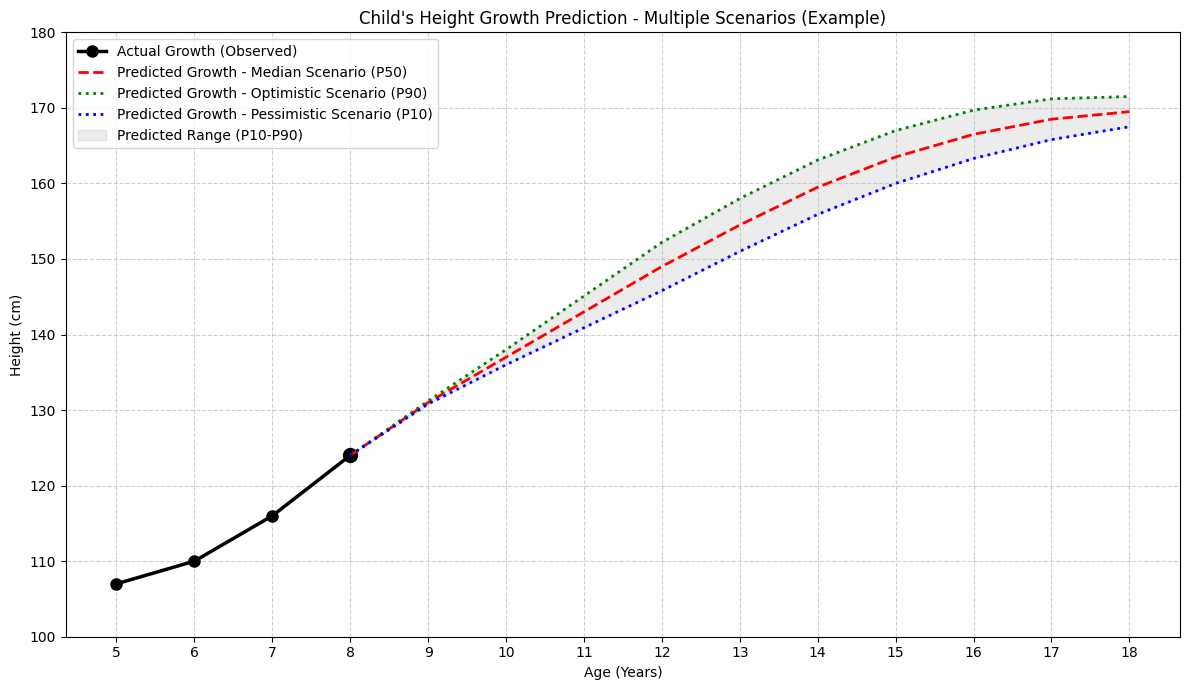

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# --- 가상 데이터 생성 (실제 데이터와 AI 모델 예측값으로 대체 필요) ---
age = np.array([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

# 실제 키 측정치 (예시: 8세까지 측정)
actual_height_observed = np.array([107, 110, 116, 124, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan])
current_age_index = 3 # 8세에 해당 (0부터 시작하는 인덱스)
current_height_observed = actual_height_observed[current_age_index]

# AI 예측 성장 시나리오 (현재 관찰된 키에서 시작하여 파생)
# P50 (중간 시나리오) 예측
predicted_p50 = np.full_like(age, np.nan, dtype=float)
predicted_p50[current_age_index] = current_height_observed
# 예시: 점진적 성장률로 P50 예측치 생성
growth_rate_p50 = np.array([7, 6, 6, 6, 5.5, 5, 4, 3, 2, 1, 0.5]) # 8세 이후 성장률
for i in range(len(growth_rate_p50)):
    if current_age_index + 1 + i < len(age):
        predicted_p50[current_age_index + 1 + i] = predicted_p50[current_age_index + i] + growth_rate_p50[i]

# P90 (낙관적 시나리오) 예측 - P50 보다 약간 더 큰 성장
predicted_p90 = np.full_like(age, np.nan, dtype=float)
predicted_p90[current_age_index] = current_height_observed
# 예시: P50 성장률에 약간의 가산치 부여
growth_rate_p90_offset = np.array([0.2, 0.5, 0.7, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
for i in range(len(growth_rate_p50)):
    if current_age_index + 1 + i < len(age):
        predicted_p90[current_age_index + 1 + i] = predicted_p50[current_age_index + 1 + i] + growth_rate_p90_offset[i]*(i+1) # 시간이 지날수록 차이 약간 더 벌어지도록

# P10 (비관적 시나리오) 예측 - P50 보다 약간 작은 성장
predicted_p10 = np.full_like(age, np.nan, dtype=float)
predicted_p10[current_age_index] = current_height_observed
# 예시: P50 성장률에 약간의 감산치 부여
growth_rate_p10_offset = np.array([0.2, 0.5, 0.7, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
for i in range(len(growth_rate_p50)):
    if current_age_index + 1 + i < len(age):
        predicted_p10[current_age_index + 1 + i] = predicted_p50[current_age_index + 1 + i] - growth_rate_p10_offset[i]*(i+1)


# --- 시각화 ---
plt.figure(figsize=(12, 7))

# 실제 성장 곡선 (관찰된 부분)
plt.plot(age[:current_age_index+1], actual_height_observed[:current_age_index+1], 'k-', linewidth=2.5, marker='o', markersize=8, label='Actual Growth (Observed)')
plt.plot(age[current_age_index], current_height_observed, 'ko', markersize=10) # 현재 키 강조

# AI 예측 성장 시나리오 (P50 - 중간)
plt.plot(age[current_age_index:], predicted_p50[current_age_index:], 'r--', linewidth=2, label='Predicted Growth - Median Scenario (P50)')

# AI 예측 성장 시나리오 (P90 - 낙관적)
plt.plot(age[current_age_index:], predicted_p90[current_age_index:], 'g:', linewidth=2, label='Predicted Growth - Optimistic Scenario (P90)')

# AI 예측 성장 시나리오 (P10 - 비관적)
plt.plot(age[current_age_index:], predicted_p10[current_age_index:], 'b:', linewidth=2, label='Predicted Growth - Pessimistic Scenario (P10)')

# 예측 범위 음영 처리 (P10과 P90 사이)
plt.fill_between(age[current_age_index:], predicted_p10[current_age_index:], predicted_p90[current_age_index:], color='gray', alpha=0.15, label='Predicted Range (P10-P90)')


# 그래프 설정
plt.title("Child's Height Growth Prediction - Multiple Scenarios (Example)")
plt.xlabel("Age (Years)")
plt.ylabel("Height (cm)")
plt.xticks(age)
plt.yticks(np.arange(100, round(max(predicted_p90[np.isfinite(predicted_p90)]))+11, 10)) # Y축 범위 동적 조절
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# 그래프 보여주기 (Python 환경에서 실행 시)
# plt.show()

# 대신 이미지 파일로 저장 (예시)
# plt.savefig("growth_prediction_scenario_example.png")
# print("Growth prediction scenario graph saved as growth_prediction_scenario_example.png (example)")